## Linear Regression
- kaggle dummy data, preprocessing
- sklearn
- own implementation: apply on sklearn.diabetes dataset and kaggle dummy data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.set_printoptions(suppress=True)

### Load data, check null, fillna or dropna, visualization

In [144]:
# only one one data points has null in y value - drop
test = pd.read_csv('data/test.csv').dropna()
train = pd.read_csv('data/train.csv').dropna()

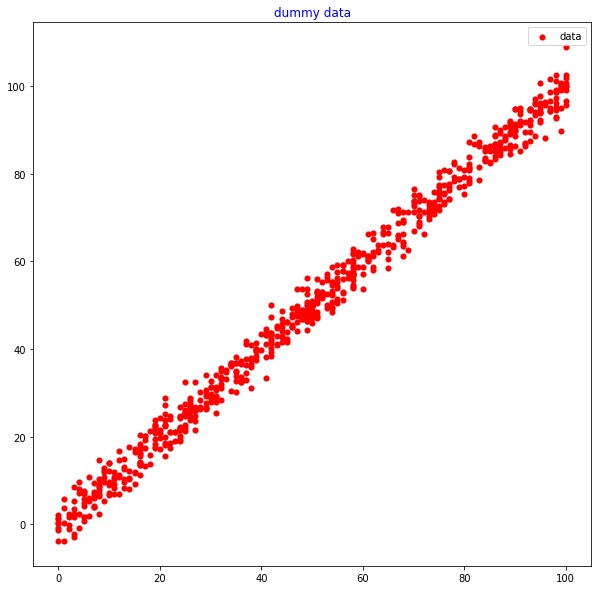

In [145]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(train['x'], train['y'], label='data', linewidth=0.1, color='red')
ax.set_title('dummy data', fontsize=12, color='blue')
ax.legend(loc='best')
plt.show()

In [185]:
X_train = np.array(train['x']).reshape(-1,1).astype(int)
Y_train = np.array(train['y']).reshape(-1,1).astype(int)
X_test = np.array(test['x']).reshape(-1,1).astype(int)
Y_test = np.array(test['y']).reshape(-1,1).astype(int)

In [160]:
X_test.shape

(300, 1)

In [161]:
Y_test.shape

(300, 1)

In [146]:
X_train

array([[ 0.01628068, -0.04464164, -0.04716281, ..., -0.03949338,
         0.02736771,  0.02791705],
       [ 0.0090156 , -0.04464164,  0.04552903, ..., -0.03949338,
         0.04613233,  0.03620126],
       [ 0.02717829, -0.04464164,  0.00672779, ...,  0.03430886,
         0.04067226,  0.01134862],
       ...,
       [-0.0382074 , -0.04464164, -0.0105172 , ..., -0.00259226,
        -0.01811827, -0.01764612],
       [-0.01641217, -0.04464164, -0.05255187, ..., -0.03949338,
        -0.06832974, -0.03007245],
       [ 0.0090156 , -0.04464164, -0.02237314, ..., -0.07085934,
        -0.06291295, -0.03835666]], dtype=float32)

In [11]:
X_train[:,0].max()

100

In [12]:
Y_train[:,0].max()

108

### Using Scikilearn

In [13]:
import sklearn
from sklearn.linear_model import LinearRegression

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

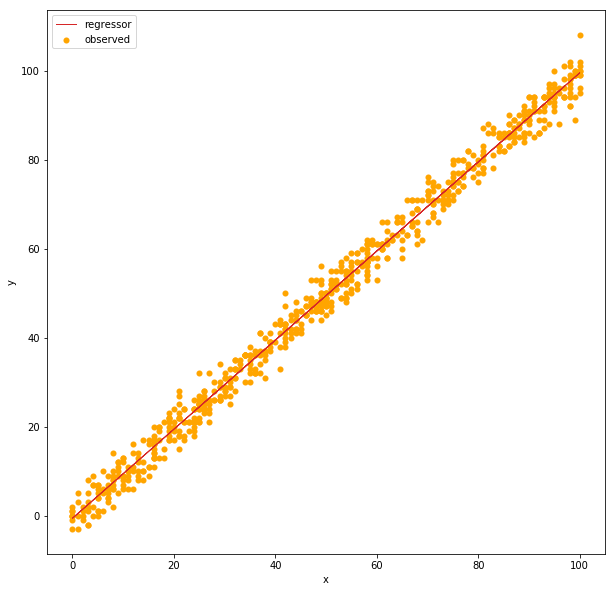

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_train, Y_train, color='orange', linewidth=0.05, label='observed')
ax.plot(X_train, regressor.predict(X_train), color='tab:red', linewidth=1, label='regressor')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

In [25]:
def obtain_matrix(reg, Y_train, X_train, Y_test, X_test):
    
    print('coef is {}'.format(reg.coef_[0][0]))
    print('intercept is {}'.format(reg.intercept_[0]))
    print('r2 is {}'.format(sklearn.metrics.r2_score(Y_train, regressor.predict(X_train))))
    print('mse is {}'.format(sklearn.metrics.r2_score(Y_test, regressor.predict(X_test))))
    
    return

In [26]:
# There is no correct value for MSE. Simply put, the lower the value the better and 
# 0 means the model is perfect. Since there is no correct answer, 
# the MSE's basic value is in selecting one prediction model over another.
obtain_matrix(regressor, Y_train, X_train, Y_test, X_test)

coef is 1.0004468112612355
intercept is -0.5688419480583562
r2 is 0.9907754943708471
mse is 0.9886850442199884


#### Prediction

In [19]:
regressor.predict(X_test)

array([[76.46556252],
       [20.44054109],
       [21.4409879 ],
       [19.44009428],
       [35.44724326],
       [14.43786022],
       [61.45886035],
       [94.47360512],
       [19.44009428],
       [ 4.43339211],
       [ 3.4329453 ],
       [18.43964747],
       [95.47405193],
       [61.45886035],
       [35.44724326],
       [14.43786022],
       [64.46020078],
       [13.43741341],
       [86.47003063],
       [68.46198803],
       [88.47092425],
       [50.45394543],
       [88.47092425],
       [26.44322196],
       [96.47449874],
       [57.45707311],
       [78.46645614],
       [20.44054109],
       [92.4727115 ],
       [26.44322196],
       [98.47539237],
       [30.4450092 ],
       [32.44590282],
       [79.46690295],
       [27.44366877],
       [46.45215818],
       [52.45483905],
       [68.46198803],
       [27.44366877],
       [32.44590282],
       [90.47181788],
       [70.46288165],
       [49.45349862],
       [75.46511571],
       [ 3.4329453 ],
       [36

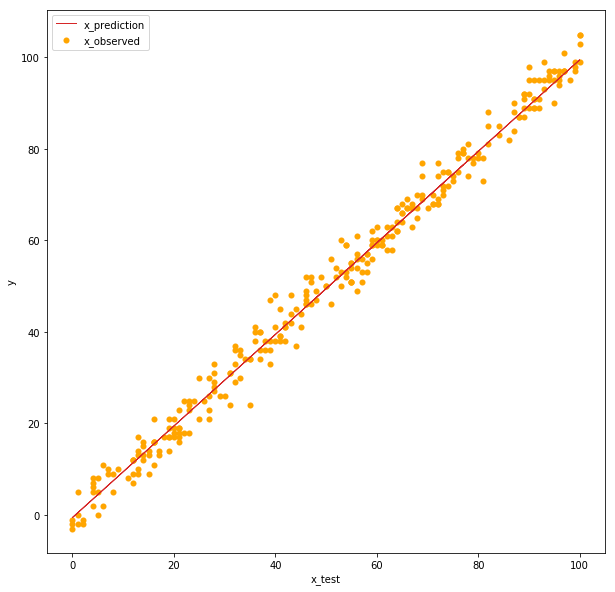

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_test, Y_test, color='orange', linewidth=0.05, label='x_observed')
ax.plot(X_test, regressor.predict(X_test), color='tab:red', linewidth=1, label='x_prediction')
ax.set_xlabel('x_test')
ax.set_ylabel('y')
ax.legend()

### Using statsmodel

In [21]:
import statsmodels.api as sm

In [42]:
X_train_ = sm.add_constant(X_train)

# An intercept is not included by default and should be 
# added by the user. See statsmodels.tools.add_constant.
X_test_ = sm.add_constant(X_test) 
model = sm.OLS(Y_train, X_train_).fit()
prediction = model.predict(X_test_)

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.486e+04
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        06:12:46   Log-Likelihood:                -1709.8
No. Observations:                 699   AIC:                             3424.
Df Residuals:                     697   BIC:                             3433.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5688      0.211     -2.692      0.007      -0.984      -0.154
x1             1.0004      0.004    273.610      0.000       0.993       1.008
==============================================================================
Omnibus:                        0.158   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.222
Skew:                           0.030   Prob(JB):                        0.895
Kurtosis:                       2.937   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

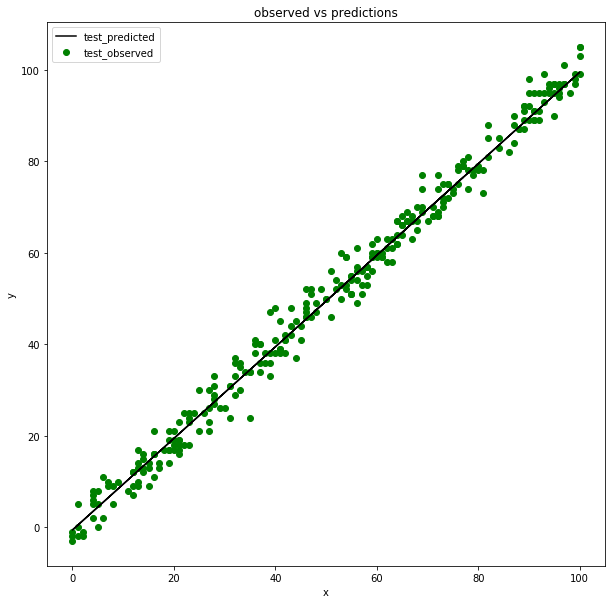

In [52]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(X_test, Y_test, label='test_observed', color='green')
ax.plot(X_test, model.predict(X_test_), label='test_predicted', color='black')
ax.set_title('observed vs predictions')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

### My own implementation of linear model 

In [186]:
class linear_model():
    
    def __init__(self):
        
        pass
    
    def initialise_params(self, num_dim):
        
        w = np.zeros((num_dim, 1))
        b = 0
        
        return w, b 
        
    def loss(self, X, y, w, b):
        
        num_train = X.shape[0]
#         num_features = X.shape[1]
        
        y_hat = np.dot(X, w) + b
        
        loss = np.sum((y_hat - y) ** 2) / num_train
        dw = np.dot(X.T, (y_hat - y)) / num_train
        db = np.sum((y_hat - y)) / num_train
        
        return y_hat, loss, dw, db
    
    def train(self, X, y, learning_rate, num_epoch):
        
        w, b = self.initialise_params(X.shape[1])
        loss_list = []
        
        for i in range(1, num_epoch):
            y_hat, loss, dw, db = self.loss(X, y, w, b)
            
            loss_list.append(loss)
            
            w += -learning_rate * dw
            b += -learning_rate * db
            
            if i % 1000 == 0:
                print('epoch {} loss {}'.format(i, loss))
                
            params = {
                'w': w,
                'b': b
            }
            
            gradients = {
                'dw': dw,
                'db': db
            }
            
        return loss_list, loss, params, gradients
    
    def predict(self, X, params):
        
        w = params['w']
        b = params['b']
        
        return np.dot(X, w) + b       

#### using dummy dataset

In [189]:
lm = linear_model()
loss_list, loss, params, gradients = lm.train(X_train, Y_train, 0.00001, 100000)

epoch 1000 loss 7.886325465926176
epoch 2000 loss 7.885900314133191
epoch 3000 loss 7.885477288700458
epoch 4000 loss 7.885056378993171
epoch 5000 loss 7.884637574429703
epoch 6000 loss 7.884220864481366
epoch 7000 loss 7.883806238672114
epoch 8000 loss 7.883393686578313
epoch 9000 loss 7.882983197828446
epoch 10000 loss 7.882574762102877
epoch 11000 loss 7.882168369133581
epoch 12000 loss 7.881764008703889
epoch 13000 loss 7.881361670648226
epoch 14000 loss 7.880961344851865
epoch 15000 loss 7.880563021250659
epoch 16000 loss 7.880166689830806
epoch 17000 loss 7.879772340628577
epoch 18000 loss 7.879379963730083
epoch 19000 loss 7.878989549271013
epoch 20000 loss 7.878601087436401
epoch 21000 loss 7.878214568460353
epoch 22000 loss 7.8778299826258396
epoch 23000 loss 7.877447320264411
epoch 24000 loss 7.877066571755985
epoch 25000 loss 7.876687727528588
epoch 26000 loss 7.876310778058122
epoch 27000 loss 7.875935713868125
epoch 28000 loss 7.875562525529526
epoch 29000 loss 7.875191203

In [190]:
prediction = lm.predict(X_test, params)
prediction

array([[76.3957889 ],
       [20.75188967],
       [21.74553073],
       [19.75824862],
       [35.65650554],
       [14.79004333],
       [61.49117303],
       [94.28132793],
       [19.75824862],
       [ 4.85363275],
       [ 3.8599917 ],
       [18.76460756],
       [95.27496899],
       [61.49117303],
       [35.65650554],
       [14.79004333],
       [64.47209621],
       [13.79640227],
       [86.33219947],
       [68.44666044],
       [88.31948159],
       [50.5611214 ],
       [88.31948159],
       [26.71373602],
       [96.26861005],
       [57.5166088 ],
       [78.38307101],
       [20.75188967],
       [92.29404582],
       [26.71373602],
       [98.25589216],
       [30.68830025],
       [32.67558236],
       [79.37671207],
       [27.70737708],
       [46.58655717],
       [52.54840352],
       [68.44666044],
       [27.70737708],
       [32.67558236],
       [90.3067637 ],
       [70.43394255],
       [49.56748034],
       [75.40214784],
       [ 3.8599917 ],
       [36

In [191]:
X_test.shape

(300, 1)

In [192]:
Y_test.shape

(300, 1)

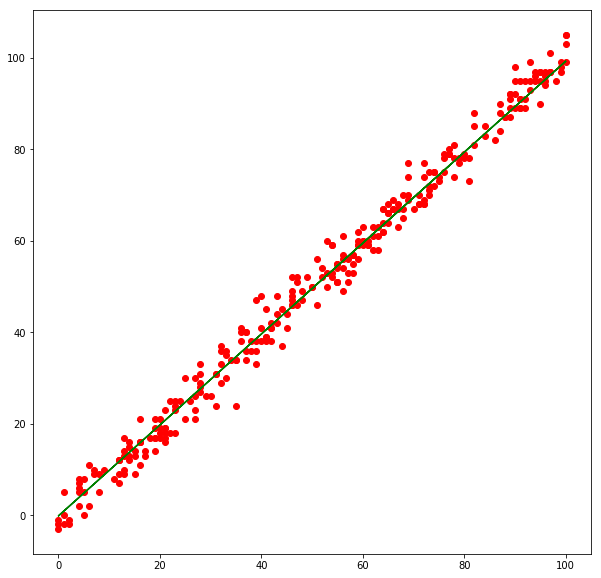

In [197]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_test[:,0], Y_test[:,0], label='observed', color='red')
ax.plot(X_test[:,0], prediction[:,0], label='predicted', color='green')

In [198]:
params

{'w': array([[0.99364106]]), 'b': -0.11457253387501799}

##### using sklearn diabetes dataset

In [171]:
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle

diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target

data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [172]:
X, y = shuffle(data, target, random_state=10)
X = X.astype(np.float32)
X

array([[ 0.01628068, -0.04464164, -0.04716281, ..., -0.03949338,
         0.02736771,  0.02791705],
       [ 0.0090156 , -0.04464164,  0.04552903, ..., -0.03949338,
         0.04613233,  0.03620126],
       [ 0.02717829, -0.04464164,  0.00672779, ...,  0.03430886,
         0.04067226,  0.01134862],
       ...,
       [-0.05273756,  0.05068012, -0.01806189, ...,  0.1081111 ,
         0.03605579, -0.04249877],
       [-0.00551456,  0.05068012, -0.00836158, ..., -0.00259226,
         0.08058546,  0.00720652],
       [-0.03457486,  0.05068012, -0.02560657, ..., -0.01550765,
         0.01482271,  0.04034337]], dtype=float32)

In [173]:
X[:1,:1]

array([[0.01628068]], dtype=float32)

In [174]:
X[0][1]

-0.044641636

In [175]:
# split train/test 
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

print('X_train shape is {}'.format(X_train.shape))
print('X_test shape is {}'.format(X_test.shape))
print('y_train shape is {}'.format(y_train.shape))
print('y_test shape is {}'.format(y_test.shape))

X_train shape is (397, 10)
X_test shape is (45, 10)
y_train shape is (397, 1)
y_test shape is (45, 1)


In [176]:
loss_list, loss, params, gradients = linear_model().train(X_train, y_train, 0.001, 100000)

epoch 1000 loss 9161.941293194375
epoch 2000 loss 6387.416293244849
epoch 3000 loss 5977.488129624352
epoch 4000 loss 5887.81002040042
epoch 5000 loss 5841.981130495543
epoch 6000 loss 5802.6230941817175
epoch 7000 loss 5764.673013949662
epoch 8000 loss 5727.437138162279
epoch 9000 loss 5690.812578445103
epoch 10000 loss 5654.776491471078
epoch 11000 loss 5619.317014598182
epoch 12000 loss 5584.423925681326
epoch 13000 loss 5550.0873775085865
epoch 14000 loss 5516.297723958501
epoch 15000 loss 5483.04549380475
epoch 16000 loss 5450.321384530746
epoch 17000 loss 5418.116258896952
epoch 18000 loss 5386.421141926924
epoch 19000 loss 5355.227217995755
epoch 20000 loss 5324.525827977236
epoch 21000 loss 5294.308466443115
epoch 22000 loss 5264.5667789127065
epoch 23000 loss 5235.292559151861
epoch 24000 loss 5206.477746520391
epoch 25000 loss 5178.114423367088
epoch 26000 loss 5150.194812471463
epoch 27000 loss 5122.711274531392
epoch 28000 loss 5095.656305695808
epoch 29000 loss 5069.022535

In [177]:
print(params)

{'w': array([[  44.54999545],
       [   2.94510877],
       [ 163.90246099],
       [ 127.91052384],
       [  38.16723287],
       [  25.37372365],
       [-104.33147473],
       [ 101.07510229],
       [ 153.152057  ],
       [  94.42043286]]), 'b': 153.25756489550187}


In [178]:
y_predict = linear_model().predict(X_test, params)
y_predict[:5]

array([[186.17802311],
       [104.43859474],
       [222.23449227],
       [162.48472825],
       [127.3624073 ]])

In [179]:
X_test[:,0]

array([ 0.05987114, -0.02367725,  0.09619652,  0.04170844, -0.04547248,
       -0.01277963, -0.0382074 ,  0.0562386 ,  0.03081083, -0.02730979,
        0.04897352,  0.01628068,  0.00538306, -0.09632801,  0.03807591,
       -0.02367725,  0.04897352,  0.00175052,  0.0562386 ,  0.03081083,
       -0.02730979,  0.04897352, -0.04910501, -0.10722563, -0.04910501,
       -0.06000263,  0.02354575, -0.00551456, -0.00551456,  0.05260606,
        0.02354575,  0.00538306, -0.04910501,  0.01264814,  0.04170844,
        0.04170844, -0.05273756, -0.04547248, -0.01641217,  0.00538306,
       -0.00914709, -0.02367725, -0.05273756, -0.00551456, -0.03457486],
      dtype=float32)

In [180]:
y_test[:,0]

array([163.,  59., 230., 118., 111.,  96.,  60., 178., 148., 317., 132.,
        47., 185., 200., 212., 151., 225., 111., 158.,  87.,  52., 180.,
        58., 200., 182., 258., 262.,  54., 166., 197., 146., 100., 346.,
       111., 110., 178., 113.,  93.,  25.,  84., 167., 122., 171., 161.,
        74.])

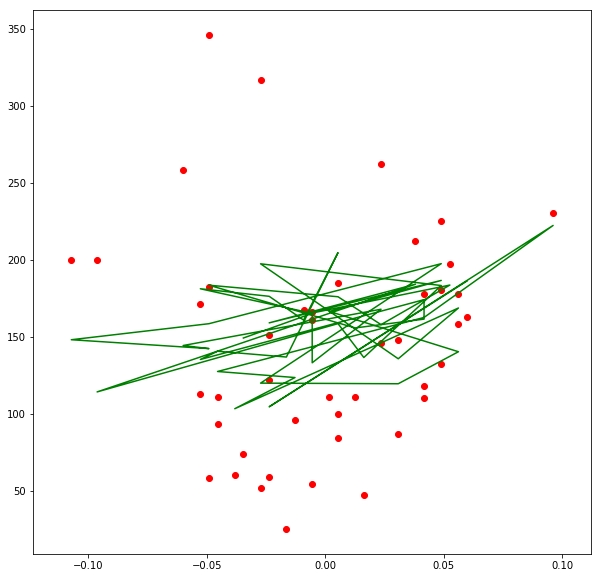

In [184]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(X_test[:,0], y_test[:,0], label='observed', color='red')
ax.plot(X_test[:,0], y_predict[:,0], label='predicted', color='green')

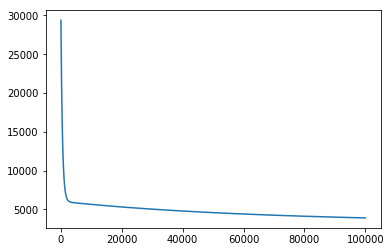

In [182]:
plt.plot(loss_list)
plt.show()